In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('hotel_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_id           134590 non-null  object 
 1   property_id          134590 non-null  int64  
 2   booking_date         134590 non-null  object 
 3   check_in_date        134590 non-null  object 
 4   checkout_date        134590 non-null  object 
 5   no_guests            134590 non-null  int64  
 6   room_category        134590 non-null  object 
 7   booking_platform     134590 non-null  object 
 8   ratings_given        134590 non-null  float64
 9   booking_status       134590 non-null  object 
 10  revenue_generated    134590 non-null  int64  
 11  revenue_realized     134590 non-null  int64  
 12  property_name        134590 non-null  object 
 13  property_category    134590 non-null  object 
 14  city                 134590 non-null  object 
 15  room_class       

In [6]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,property_category,city,room_class,successful_bookings,capacity,month_year,week_no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,Standard,18,19,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,4.0,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,Standard,18,19,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,Standard,18,19,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,4.0,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,Standard,18,19,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,Standard,18,19,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,Presidential,10,17,Jul 22,W 32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,...,38760,Atliq Seasons,Business,Mumbai,Presidential,10,17,Jul 22,W 32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,4.0,Cancelled,...,12920,Atliq Seasons,Business,Mumbai,Presidential,10,17,Jul 22,W 32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,...,32300,Atliq Seasons,Business,Mumbai,Presidential,10,17,Jul 22,W 32,weekend


In [7]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booking_id           134590 non-null  object        
 1   property_id          134590 non-null  int64         
 2   booking_date         134590 non-null  datetime64[ns]
 3   check_in_date        134590 non-null  datetime64[ns]
 4   checkout_date        134590 non-null  datetime64[ns]
 5   no_guests            134590 non-null  int64         
 6   room_category        134590 non-null  object        
 7   booking_platform     134590 non-null  object        
 8   ratings_given        134590 non-null  float64       
 9   booking_status       134590 non-null  object        
 10  revenue_generated    134590 non-null  int64         
 11  revenue_realized     134590 non-null  int64         
 12  property_name        134590 non-null  object        
 13  property_categ

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

### Analyzing booking trends

In [9]:
df['year_month'] = df['booking_date'].dt.to_period('M')
df['week_number'] = df['booking_date'].dt.strftime('%Y-W%U')

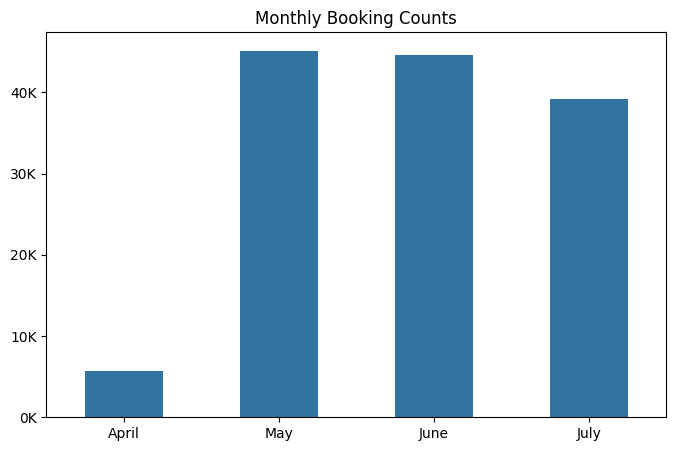

In [10]:
monthly_trend = df['year_month'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend.index, y=monthly_trend.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Booking Counts')
plt.xlabel('')
plt.xticks(range(0,4), labels=['April', 'May', 'June', 'July'])
plt.show()

Bookings start picking up in April, then jump sharply in May and stay high through June and July. This shows that the main booking season is from May to July, likely because of summer vacations. Since April shows a rising trend, starting promotions early—before May—can help bring in even more bookings.

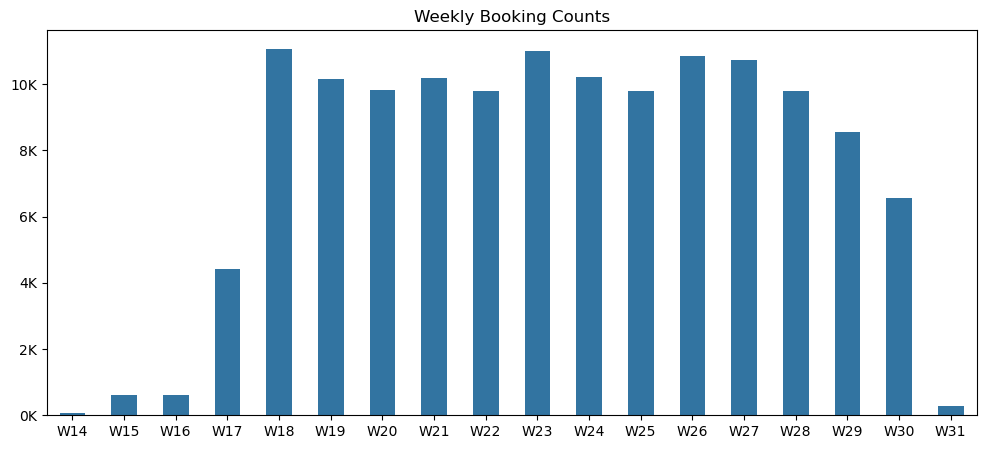

In [10]:
df['week_number'] = df['week_number'].str.extract(r'W(\d+)').astype(int)
# Get weekly trend and sort
weekly_trend = df['week_number'].value_counts().sort_index()
# Convert index back to 'Wxx' format
weekly_trend.index = 'W' + weekly_trend.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend.index, y=weekly_trend.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly Booking Counts')
plt.xlabel('')
plt.show()

Booking volume sharply rises starting Week 17, peaks between Weeks 18 and 28, and then gradually declines through Weeks 29 to 31

### Analyzing checkin trends

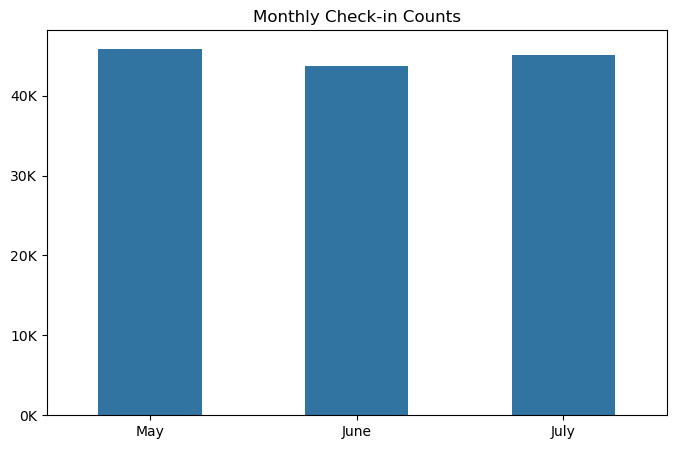

In [11]:
monthly_trend_checkin = df['month_year'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend_checkin.index, y=monthly_trend_checkin.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Check-in Counts')
plt.xlabel('')
plt.xticks(range(0,3), labels=['May', 'June', 'July'])
plt.show()

checkin counts are almost consistence for all 3 months

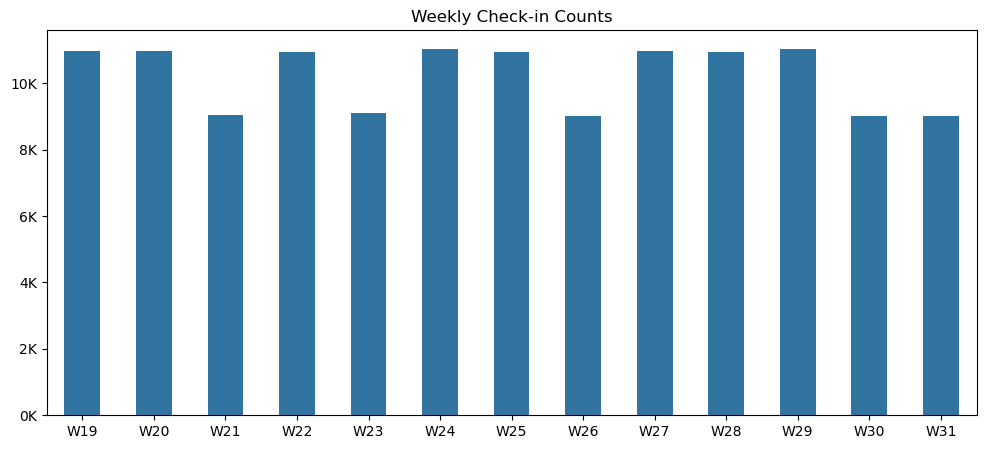

In [12]:
# Strip spaces and extract numeric week number
df['week_no'] = df['week_no'].astype(str).str.strip().str.extract(r'W\s*(\d+)')[0].astype(int)

# Get weekly trend and sort
weekly_trend_checkin = df['week_no'].value_counts().sort_index()

# Convert index back to 'Wxx' format
weekly_trend_checkin.index = 'W' + weekly_trend_checkin.index.astype(str)

# Remove W32
weekly_trend_checkin = weekly_trend_checkin.drop('W32', errors='ignore')

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend_checkin.index, y=weekly_trend_checkin.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly Check-in Counts')
plt.xlabel('')
plt.show()


check-in period starts in May and ends in July

most check-in are done in May

by considering booking trends and check-in trends we conclude that bookings for particular hotels are done minimum 1-2 weeks before the check-in

### Analyzing check-out trends

In [13]:
df['year_month_checkout'] = df['checkout_date'].dt.to_period('M')
df['week_number_checkout'] = df['checkout_date'].dt.strftime('%Y-W%U')

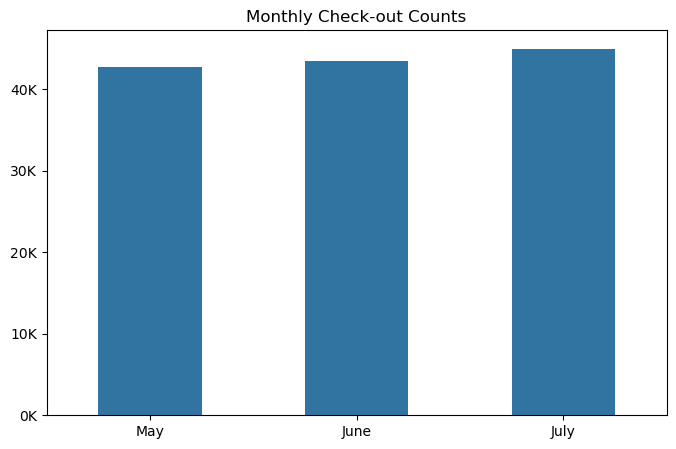

In [14]:
monthly_trend_checkout = df['year_month_checkout'].value_counts().sort_index()
monthly_trend_checkout = monthly_trend_checkout.drop('2022-08', errors='ignore')
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_trend_checkout.index, y=monthly_trend_checkout.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Monthly Check-out Counts')
plt.xlabel('')
plt.xticks(range(0,3), labels=['May', 'June', 'July'])
plt.show()

july has the most numbers of checkouts

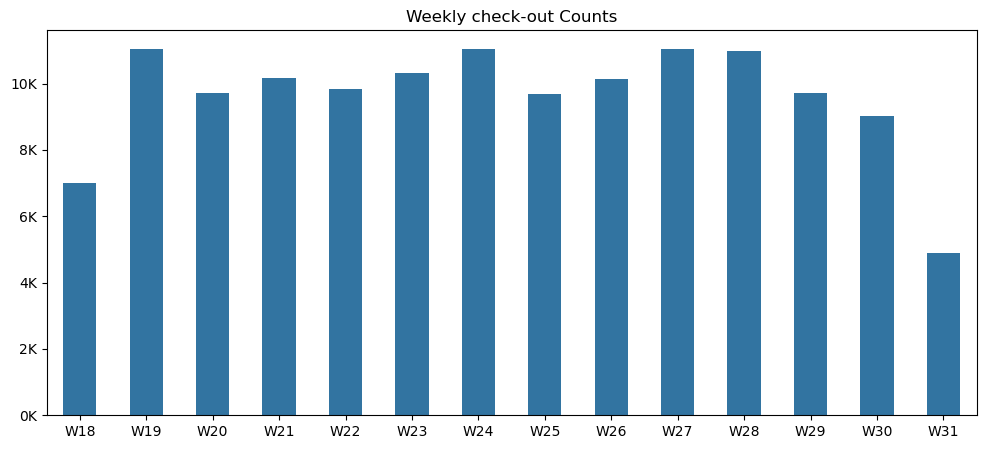

In [15]:
df['week_number_checkout'] = df['week_number_checkout'].str.extract(r'W(\d+)').astype(int)
weekly_trend_checkout = df['week_number_checkout'].value_counts().sort_index()
weekly_trend_checkout.index = 'W' + weekly_trend_checkout.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=weekly_trend_checkout.index, y=weekly_trend_checkout.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Weekly check-out Counts')
plt.xlabel('')
plt.show()

Weekly check-outs peaked consistently between Week 19 and Week 29, indicating a high volume of guest departures during the summer vacation period. The drop in Week 31 suggests the end of the holiday season and a return to lower occupancy trends.

### Revenue trends

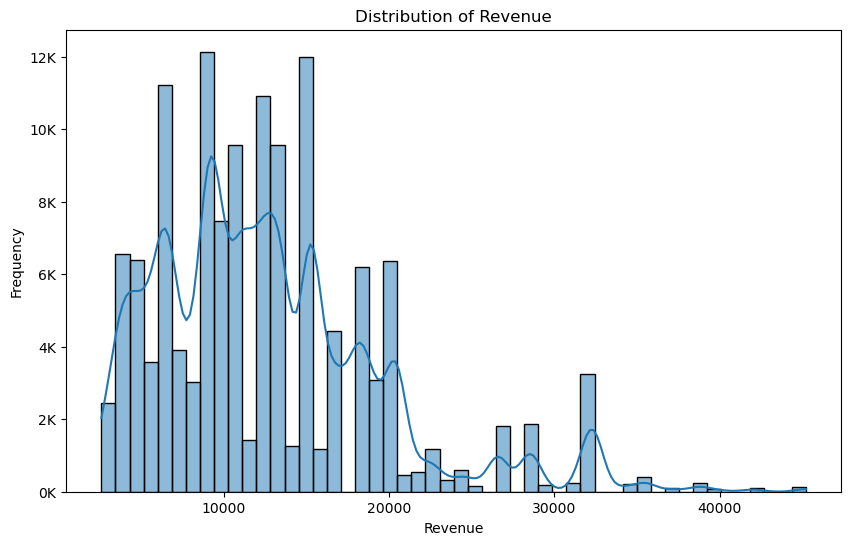

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['revenue_realized'], bins=50, kde=True)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

From the above revenue distribution plot, we can observe that most of the bookings have lower revenue. High-revenue bookings are rare but do exist — creating a long tail on the 

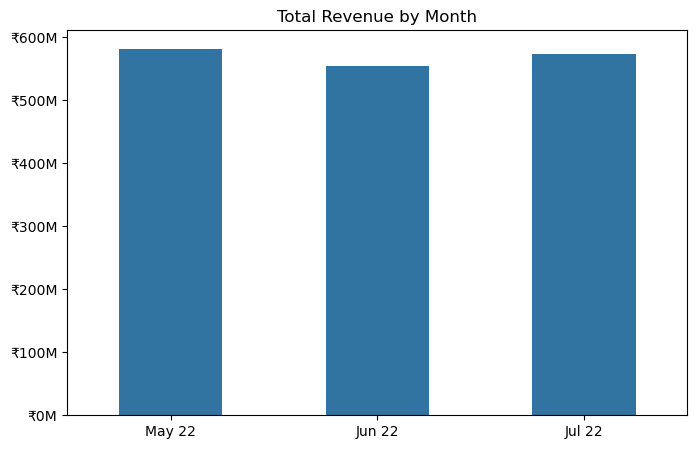

In [17]:
monthly_revenue = df.groupby('month_year')['revenue_realized'].sum().sort_index(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))

plt.title('Total Revenue by Month')
plt.xlabel('')
plt.show()

An analysis of monthly revenue trends reveals that the highest revenue contributions consistently occur during the summer vacation months. This seasonal pattern highlights a key period of increased customer activity, suggesting opportunities for targeted promotions and capacity planning.

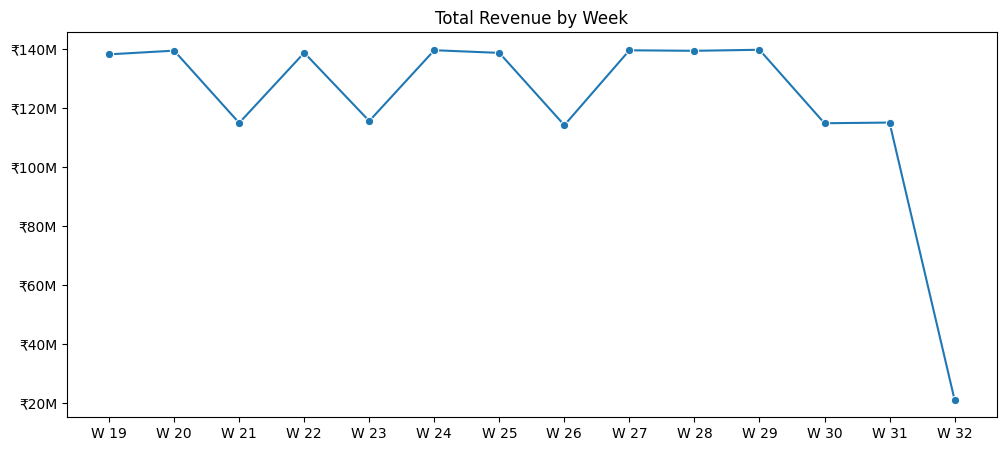

In [12]:
weekly_revenue = df.groupby('week_no')['revenue_realized'].sum().sort_index(ascending=True)
weekly_revenue = weekly_revenue.drop(32, errors='ignore')
weekly_revenue.index = weekly_revenue.index.astype(str)

plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values, marker='o')

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.xlabel('')
plt.title('Total Revenue by Week')
plt.show()

Weeks 19 to 30 represent the peak (on-season) period, characterized by consistently high revenue levels. In contrast, Weeks 31 and 32 show a clear downward trend, indicating the beginning of the off-season as customer activity and revenue start to decline.

   property_name property_category  revenue_realized
0      Atliq Bay            Luxury         260051178
1      Atliq Blu            Luxury         260855522
2     Atliq City          Business         285811939
3  Atliq Exotica            Luxury         320312468
4   Atliq Grands            Luxury         211532764
5   Atliq Palace          Business         304081863
6  Atliq Seasons          Business          66125495


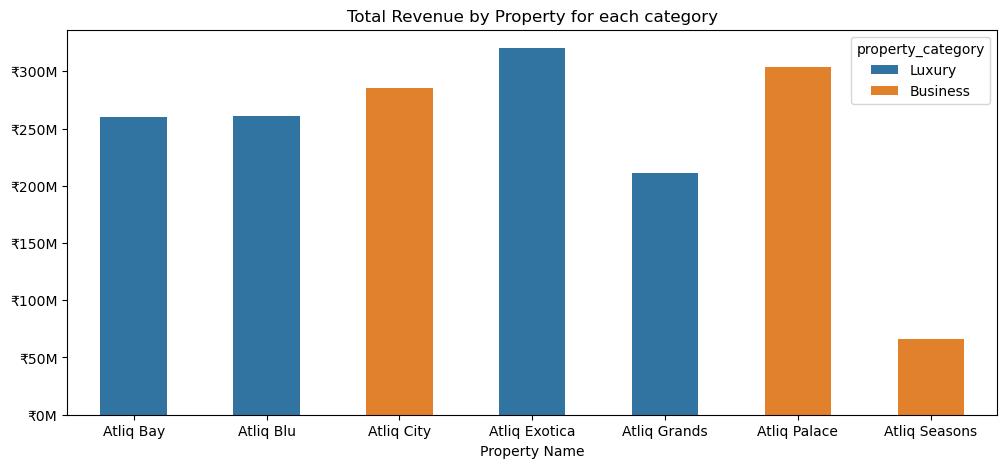

In [19]:
property_category_revenue = df.groupby(['property_name', 'property_category'])['revenue_realized'].sum().reset_index()
print(property_category_revenue)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='property_name' , y='revenue_realized', hue='property_category', data=property_category_revenue, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Property for each category')
plt.xlabel('Property Name')
plt.ylabel('')
plt.show()

Atliq Exotica leads in total revenue, followed by Atliq Palace and Atliq City from the business category. While most luxury properties perform well, Atliq Seasons shows the lowest revenue among all properties.

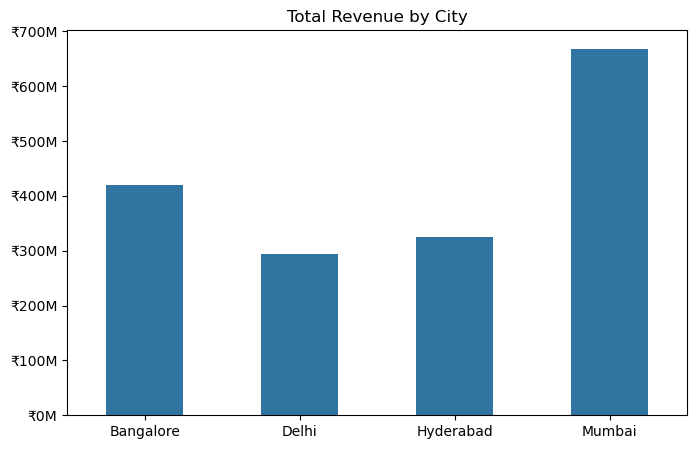

In [20]:
city_revenue = df.groupby('city')['revenue_realized'].sum()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_revenue.index , y=city_revenue.values, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by City')
plt.xlabel('')
plt.show()

mumbai city has the highest revenue generated

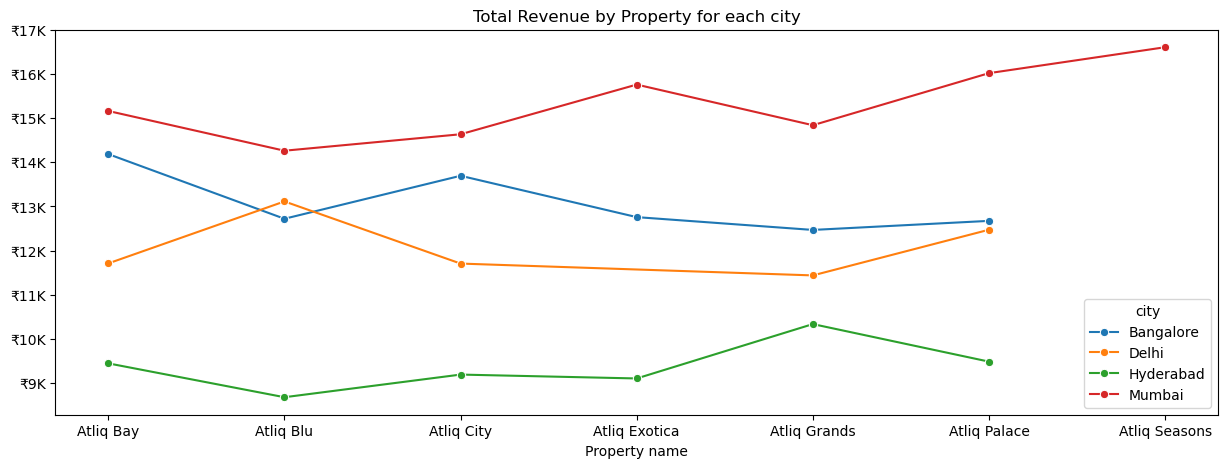

In [21]:
city_revenue = df.groupby(['city', 'property_name'])['revenue_realized'].mean().reset_index()
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='property_name' , y='revenue_realized', data=city_revenue, hue='city', marker='o')

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e3)}K'))
plt.title('Total Revenue by Property for each city')
plt.xlabel('Property name')
plt.ylabel('')
plt.show()

Mumbai consistently outperforms other cities in revenue across all properties, with a noticeable peak at Atliq Seasons.

  room_category    room_class  revenue_realized
0           RT1      Standard         309580895
1           RT2         Elite         560271204
2           RT3       Premium         462166344
3           RT4  Presidential         376752786


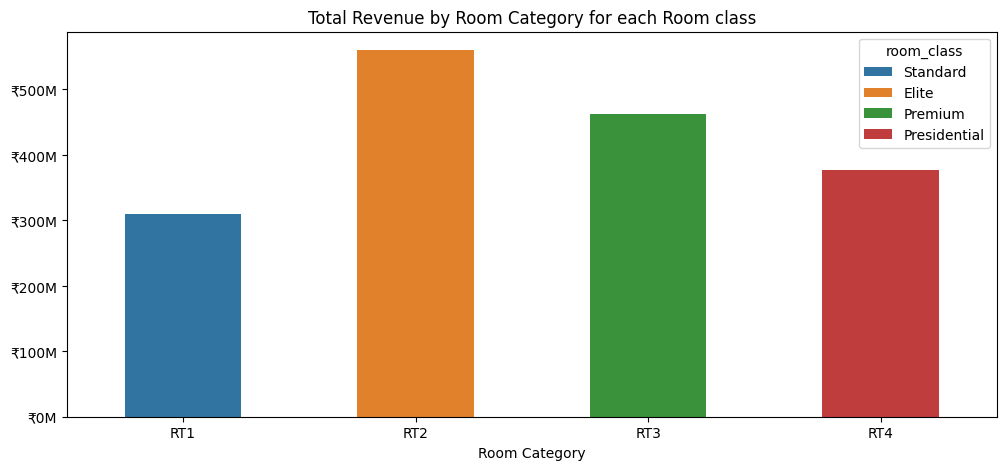

In [13]:
room_category_revenue = df.groupby(['room_category', 'room_class'])['revenue_realized'].sum().reset_index()
print(room_category_revenue)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='room_category' , y='revenue_realized', data=room_category_revenue, hue='room_class', width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Room Category for each Room class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.show()

Elite rooms are the top revenue-generating category, indicating strong demand for upscale offerings. Premium and Presidential rooms follow, while Standard rooms contribute the least, highlighting a clear guest preference toward higher-tier room experiences.

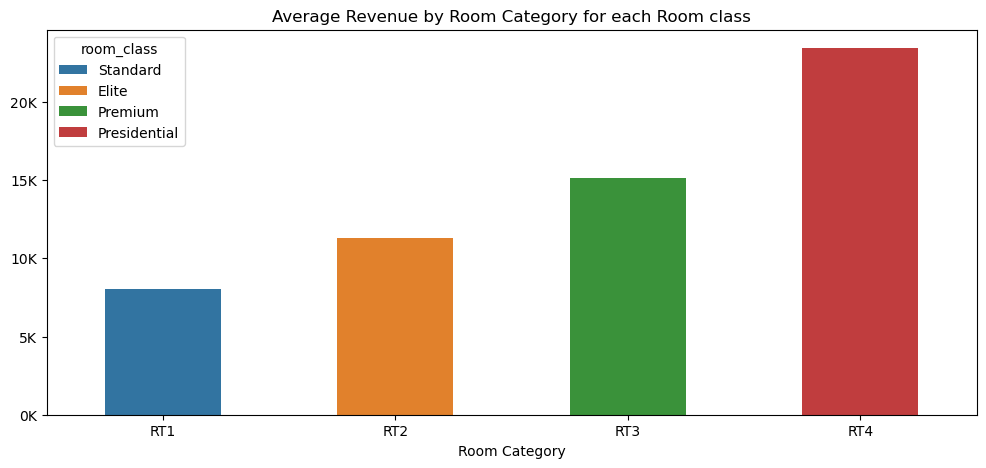

In [ ]:
room_category_revenue = df.groupby(['room_category', 'room_class'])['revenue_realized'].mean().reset_index()
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='room_category' , y='revenue_realized', data=room_category_revenue, hue='room_class', width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e3)}K'))
plt.title('Average Revenue by Room Category for each Room class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.show()

Elite rooms generate the highest total revenue with a moderate average revenue per booking, making them the most frequently booked and the biggest overall contributor to revenue.

Presidential rooms have moderate to high total revenue, but boast the highest average revenue per booking, indicating fewer bookings but maximum value per guest.

Premium rooms perform strongly in both total and average revenue, offering a balanced contribution in terms of volume and value.
On the other hand, Standard rooms bring in the lowest total and average revenue, making them the least profitable room class in the portfolio.



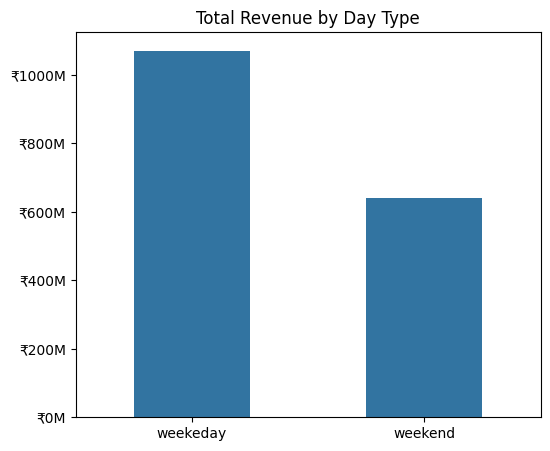

In [18]:
dayType_revenue = df.groupby('day_type')['revenue_realized'].sum()
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=dayType_revenue.index , y=dayType_revenue.values, width=0.5)

# Format y-axis to show values in M (millions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e6)}M'))
plt.title('Total Revenue by Day Type')
plt.xlabel('')
plt.ylabel('')
plt.show()

Weekdays contribute significantly more to total revenue compared to weekends, indicating stronger business or regular travel demand during the workweek.

Consider introducing weekend-specific promotions or leisure packages to boost occupancy and revenue on lower-performing days, helping balance overall utilization across the week.

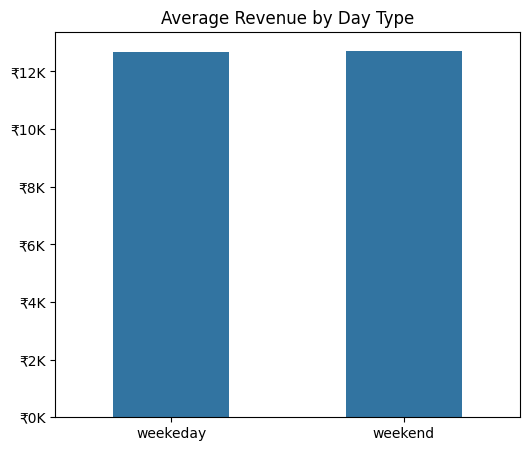

In [17]:
dayType_revenue = df.groupby('day_type')['revenue_realized'].mean()
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=dayType_revenue.index , y=dayType_revenue.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e3)}K'))

plt.title('Average Revenue by Day Type')
plt.xlabel("")  # 👈 This removes the x-axis label
plt.show()


Although weekdays generate higher total revenue, the average revenue per booking is nearly the same for both weekdays and weekends. This suggests that the lower weekend revenue is due to fewer bookings, not lower spend per customer.

###  Occupany % & Room trends

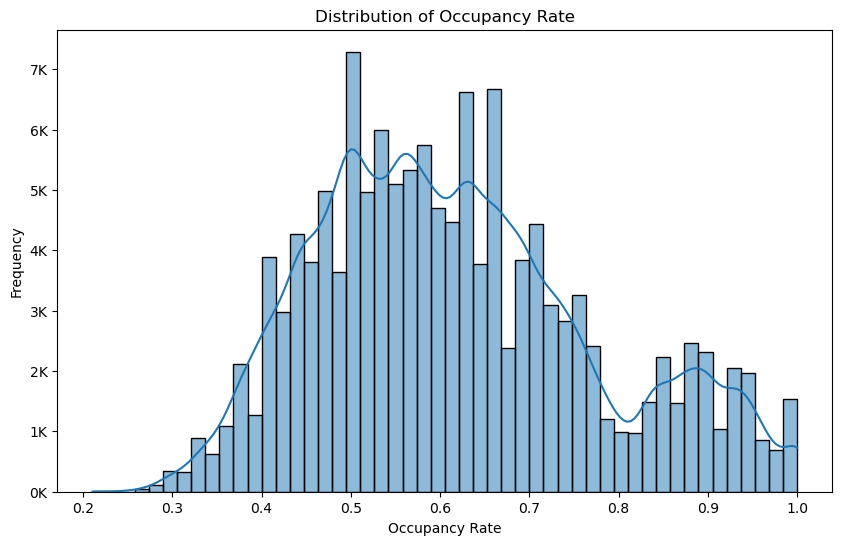

In [26]:
df['occupancy_rate'] = df['successful_bookings'] / df['capacity']
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['occupancy_rate'], bins=50, kde=True)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy Rate')
plt.show()

The distribution of occupancy rates is concentrated between 0.45 and 0.70, indicating that most properties operate at moderate utilization levels. While a few instances reach high occupancy (above 0.9), the overall pattern is slightly right-skewed, suggesting room for improvement.

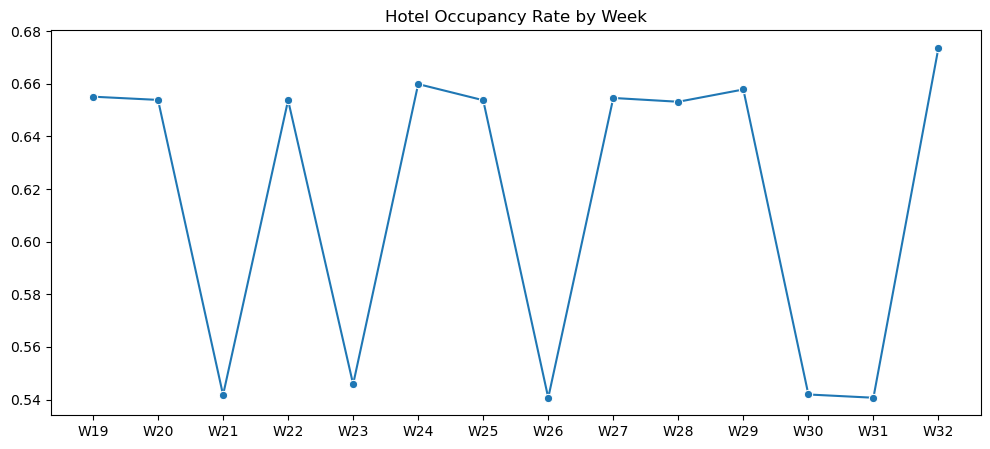

In [27]:
occupancy_week = df.groupby('week_no')['occupancy_rate'].mean()
occupancy_week.index = 'W' + occupancy_week.index.astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=occupancy_week, marker="o")
plt.title('Hotel Occupancy Rate by Week')
plt.xlabel('')
plt.ylabel('')
plt.show()

The occupancy rate consistently peaks during the last week of each month (W20, W24, W28, W32)

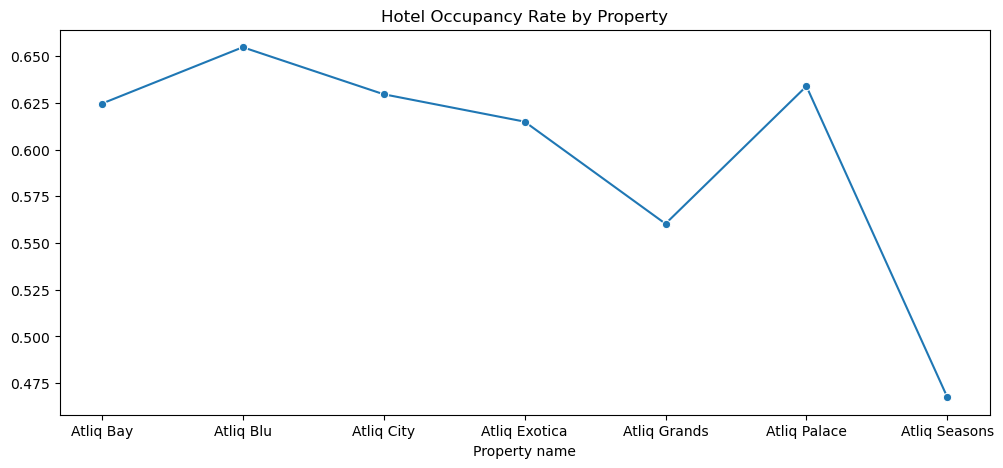

In [28]:
occupancy_property = df.groupby('property_name')['occupancy_rate'].mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=occupancy_property, marker="o")
plt.title('Hotel Occupancy Rate by Property')
plt.xlabel('Property name')
plt.ylabel('')
plt.show()

Property Atliq Blu has the highest occupancy rate

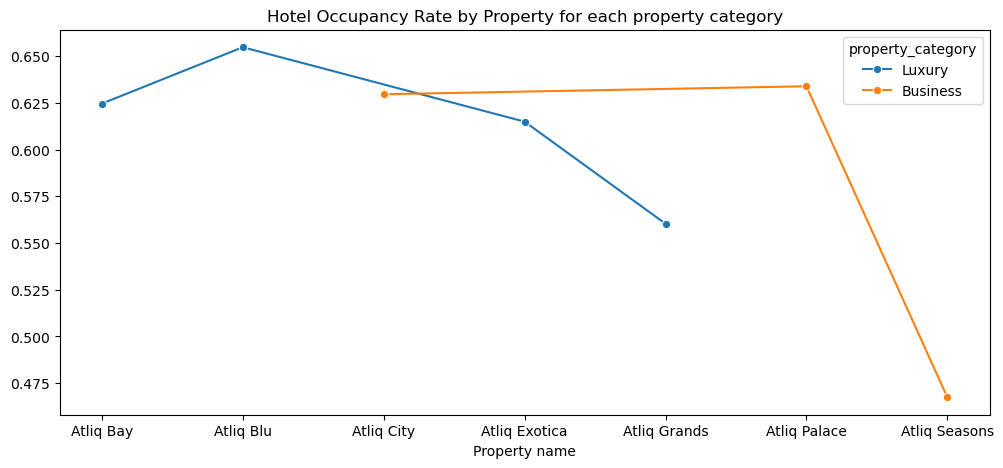

In [29]:
occupancy_property_category = df.groupby(['property_name', 'property_category'])['occupancy_rate'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x='property_name', y='occupancy_rate', hue='property_category', data=occupancy_property_category, marker="o")
plt.title('Hotel Occupancy Rate by Property for each property category')
plt.xlabel('Property name')
plt.ylabel('')
plt.show()

Luxury properties like Atliq Blu and Atliq Bay maintain higher occupancy rates, while business properties such as Atliq Seasons show notably lower performance

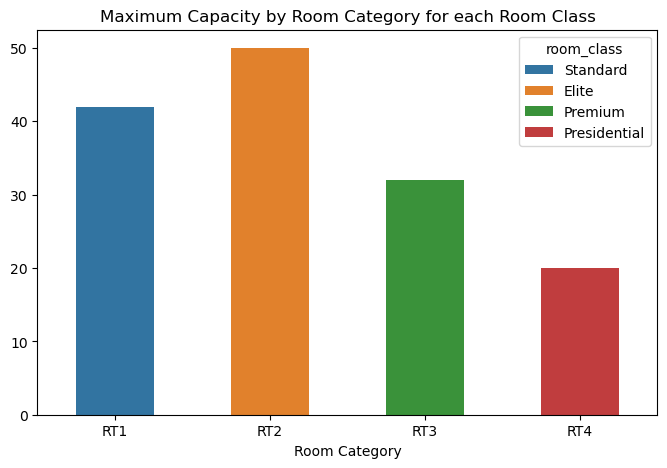

In [30]:
room_capacity = df.groupby(['room_category', 'room_class'])['capacity'].max().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='room_category', y='capacity', data=room_capacity, hue='room_class', width=0.5)
plt.title('Maximum Capacity by Room Category for each Room Class')
plt.xlabel('Room Category')
plt.ylabel('')
plt.show()

Elite and Standard room categories offer the highest capacity, indicating a focus on volume and availability, while Presidential rooms have the lowest capacity, reflecting their exclusive, high-value positioning within the room mix.

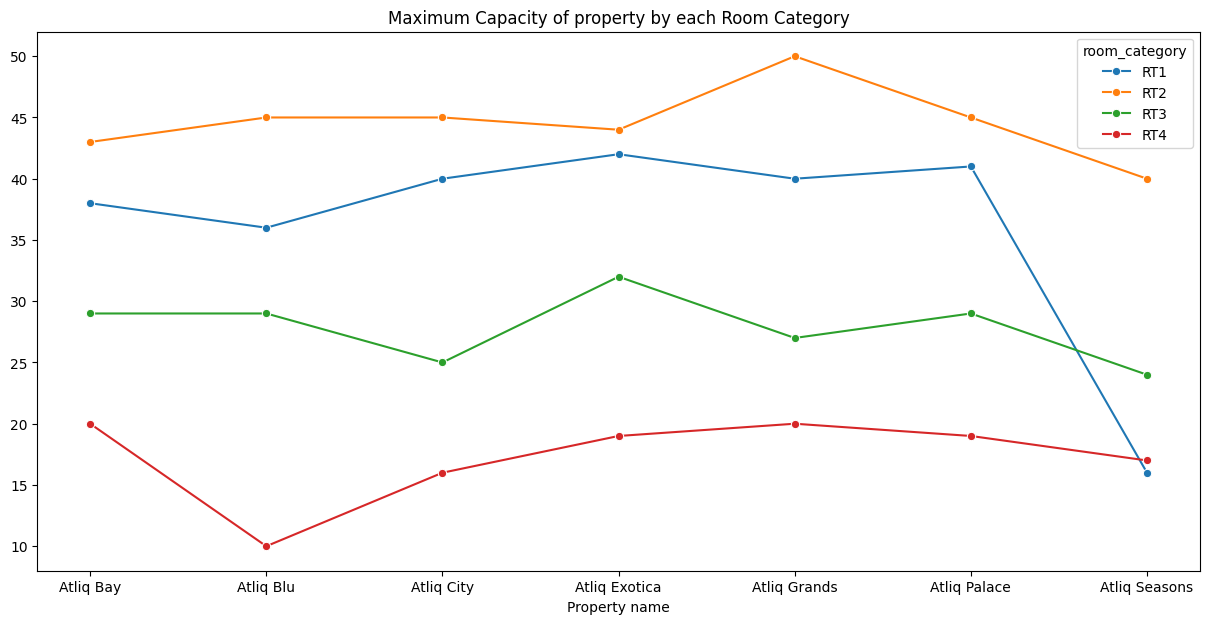

In [13]:
property_room_capacity = df.groupby(['property_name', 'room_category'])['capacity'].max().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='property_name', y='capacity', hue='room_category', data=property_room_capacity, marker='o')
plt.title('Maximum Capacity of property by each Room Category')
plt.xlabel('Property name')
plt.ylabel('')
plt.show()

Most properties maintain high capacity for Elite rooms (RT2), reflecting a strategic focus on this well-balanced, high-demand segment. Premium and Standard rooms vary by property, likely tailored to local guest needs. Presidential rooms (RT4) are consistently limited, reinforcing their exclusive, luxury positioning.

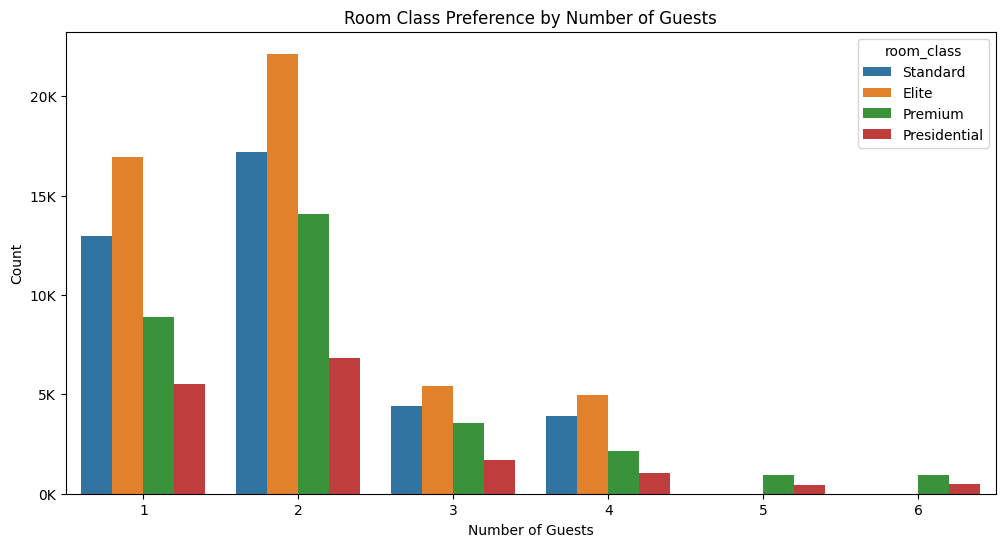

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='no_guests', hue='room_class', data=df)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.title('Room Class Preference by Number of Guests')
plt.show()

Elite rooms are the most preferred across all guest group sizes, especially for solo and two-person stays
Premium and Presidential rooms see relatively higher share, suggesting they're favored for accommodating larger parties

### Booking platform analysis

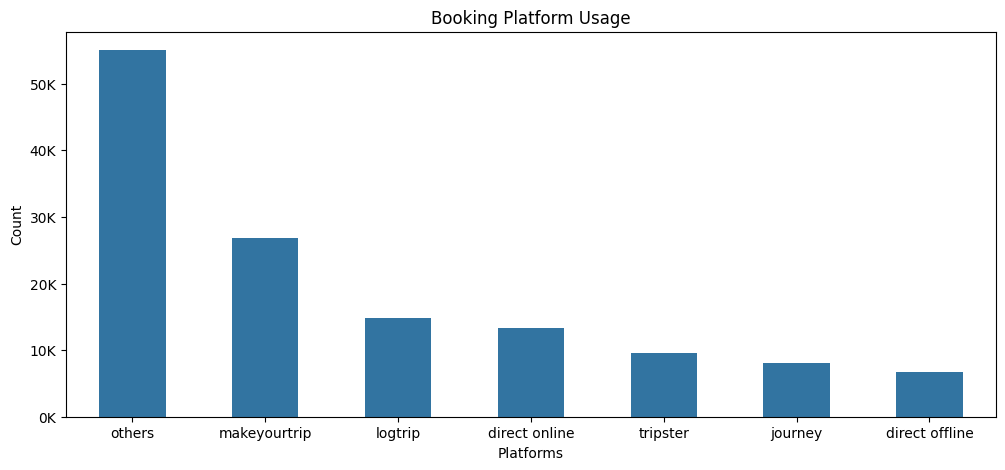

In [14]:
platform_count = df['booking_platform'].value_counts()
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=platform_count.index , y=platform_count.values, width=0.5)

# Format y-axis to show values in K (thousands)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.title('Booking Platform Usage')
plt.xlabel('Platforms')
plt.ylabel('Count')
plt.show()

other booking platform has the highest number of user followed by makeyourtrip

### Booking Status Analysis

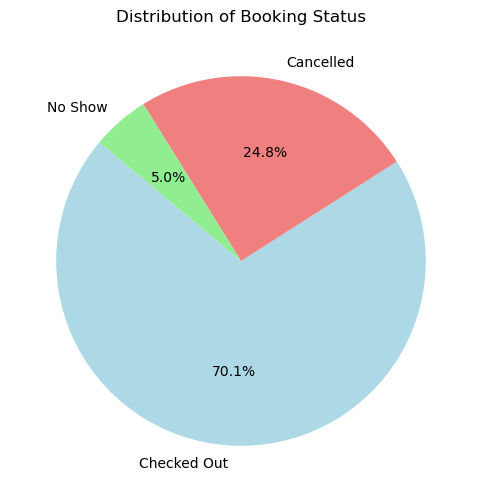

In [33]:
booking_status_counts = df['booking_status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Booking Status')
plt.show()

most of the bookings are in checkout category with 70% 





#### Conclusion :
1. as bookings are done 1-2 weeks prior the checkin date pricing should be increased before hand for greater profit
2. on weekends pricing should be high for more profit
3. room class elite has the highest room capacity with less price. So, price should be increased for Elite for more profit generation
4. A high % of bookings result in check-out, showing good operational efficiency.
5. Luxury properties (e.g., Atliq Blu, Bay) show better occupancy compared to Business properties like Atliq Seasons.
6. prices are static it should be dynamic for more profit (eg. weekends price should be little higher compare to weekdays )